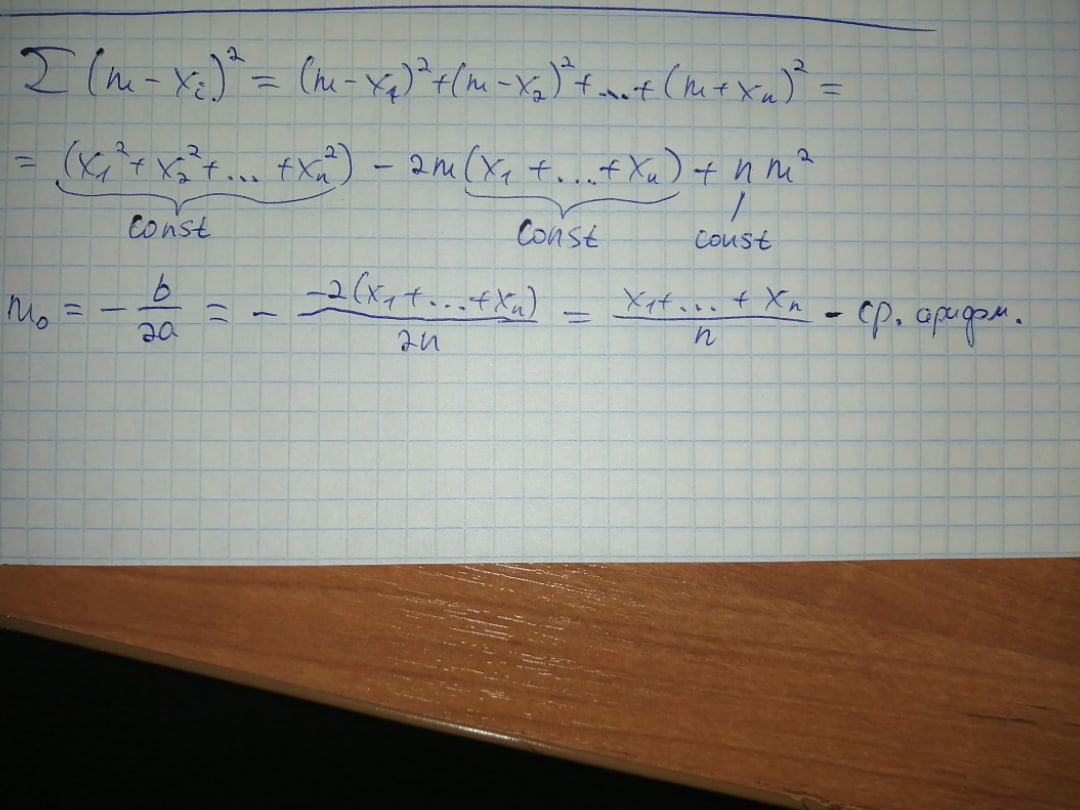

Касательно доп задания решение представлено выше для MSE, для модуля нашел смешанную информацию, что это либо среднее арифметическое, либо медиана, медиана нравится больше (про медиану десь: https://studopedia.ru/21_63964_metodi-naimenshih-kvadratov-i-naimenshih-moduley-normalnoe-raspredelenie.html)


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")
import plotly.express as px

In [ ]:
def f(x):
    return 3 * x ** 3 - 2 * x**2 + x

In [ ]:
def f_real(x):
    return 3 * x ** 3 - 2 * x**2 + x + np.random.normal(0, 1, x.shape)

In [ ]:
x = np.linspace(-1, 1, 10)  # 10 точек на отрезке [-1, 1]
y = f(x)
coefs = np.polyfit(x, y, deg = 2)
coefs

array([-2.00000000e+00,  3.17037037e+00, -9.55004142e-16])

In [ ]:
x = np.linspace(-1, 1, 10)
y = f_real(x)

In [ ]:
x100 = np.linspace(-1, 1, 100)

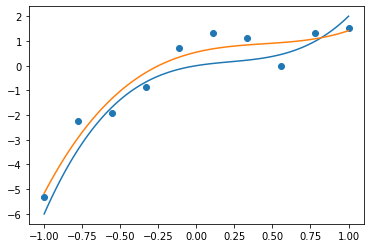

In [ ]:
coefs = np.polyfit(x, y, deg = 3)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

Проблема переобучения, слишком "изгибающийся граффик" что не соответвует реальности

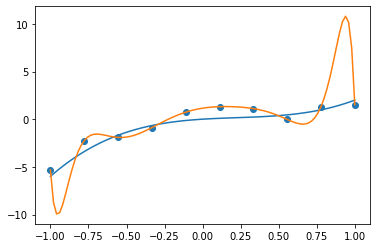

In [ ]:
# Место для решения
# увеличил до степени = 20
coefs = np.polyfit(x, y, deg = 20)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

In [ ]:
# y_real - это np.array c реальными значениями в точках
# y_pred - это np.array c предсказанными нами значениями в точках
# они одной длины
def MSE(y_real, y_pred): return (sum((y_pred - y_real)**2)/len(y_pred))

In [ ]:

real = np.array([1,2,3])
pred = np.array([2,3,5])
MSE(real,pred)

2.0

In [ ]:
# возьмем 10 случайных точек от 0 до 1
x_test = np.random.random(10) 

# превратим их в 10 случайных точек от -1 до 1
x_test = 2 * x_test - 1
x_test

array([-0.22193327,  0.49389598, -0.83631102,  0.70712499,  0.3288643 ,
       -0.04528134, -0.8040136 , -0.60750068,  0.79760637, -0.1806977 ])

In [ ]:
x = np.linspace(-1, 1, 10)
list_y = []
for i in range(1,20):
  coefs = np.polyfit(x,f_real(x), deg = i)
  poly = np.poly1d(coefs)
  list_y.append(MSE(f(x_test),poly(x_test)))
fig = px.line(y=list_y, title='Зависимость MSE от степени',labels={'x' : 'Степень','y':'MSE'})
fig.show()

При степени 2 минимальна

In [ ]:
for t in range(1,6):
  x = np.linspace(-1, 1, t*10)
  list_y = []
  for i in range(1,20):
    coefs = np.polyfit(x,f_real(x), deg = i)
    poly = np.poly1d(coefs)
    list_y.append(MSE(f(x_test),poly(x_test)))
  fig = px.line(y=list_y, title='Зависимость MSE от степени',labels={'x' : 'Степень','y':'MSE'})
  fig.show()

сначала увеличивается, а потом падает за счет увеличения "трейна" для обучения в виде колва точек

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# место для решения
def sigmoida(x):
  return (1/(1+np.exp(-x)))

def sigmoida_noize(x):
  return ((1/(1+np.exp(-x))) + np.random.normal(0, 0.05, len(x)))

In [ ]:
x = np.linspace(-3,3,10)
x_test = np.random.uniform(-3, 3,10)
x_20 = np.linspace(-3,3,20)
x_40 = np.linspace(-3,3,40)
x_60 = np.linspace(-3,3,60)
list_xx =[x_20,x_40,x_60]


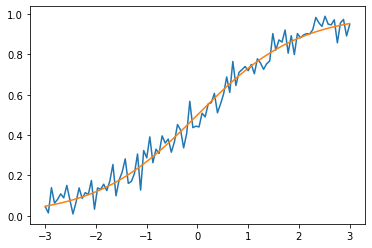

In [ ]:
plt.plot(np.linspace(-3,3,100),sigmoida_noize(np.linspace(-3,3,100)))
plt.plot(np.linspace(-3,3,100),sigmoida(np.linspace(-3,3,100)))

plt.show()

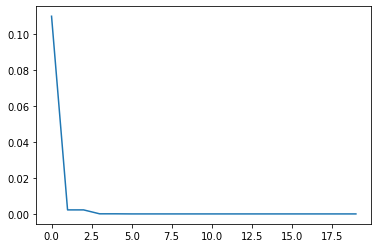

In [ ]:
list_y = []
for i in range(0,20):
  coefs = np.polyfit(x, sigmoida(x),deg = i)
  poly = np.poly1d(coefs)
  list_y.append(MSE(sigmoida(x),poly(x)))
plt.plot(list_y)
plt.show()

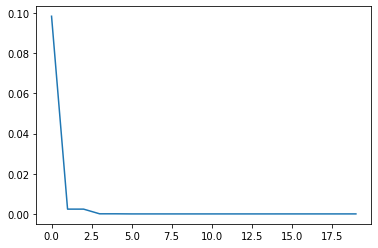

In [ ]:
list_y = []
for i in range(0,20):
  coefs = np.polyfit(x, sigmoida(x),deg = i)
  poly = np.poly1d(coefs)
  list_y.append(MSE(sigmoida(x_test),poly(x_test)))
plt.plot(list_y)
plt.show()

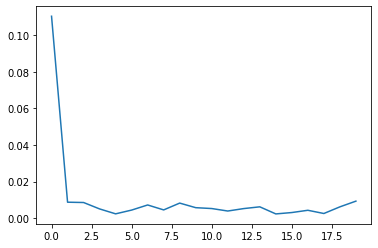

In [ ]:
list_y = []
for i in range(0,20):
  coefs = np.polyfit(x, sigmoida_noize(x),deg = i)
  poly = np.poly1d(coefs)
  list_y.append(MSE(sigmoida_noize(x),poly(x)))
plt.plot(list_y)
plt.show()

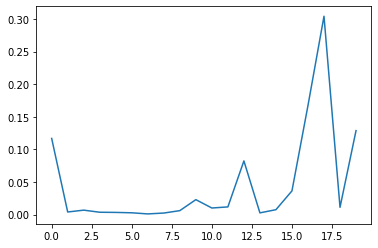

In [ ]:
list_y = []
for i in range(0,20):
  coefs = np.polyfit(x, sigmoida_noize(x),deg = i)
  poly = np.poly1d(coefs)
  list_y.append(MSE(sigmoida_noize(x3_test),poly(x_test)))
plt.plot(list_y)
plt.show()

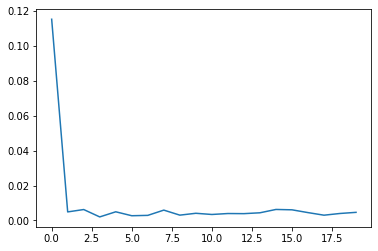

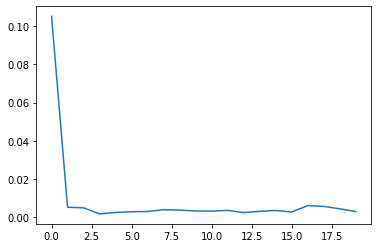

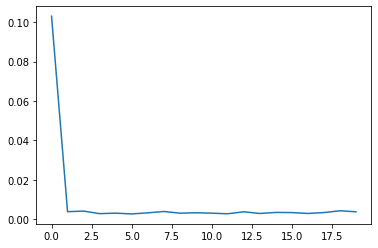

In [ ]:
for j in list_xx:
  list_y = []
  for i in range(0,20):
    coefs = np.polyfit(j, sigmoida_noize(j),deg = i)
    poly = np.poly1d(coefs)
    list_y.append(MSE(sigmoida_noize(j),poly(j)))
  plt.plot(list_y)
  plt.show()

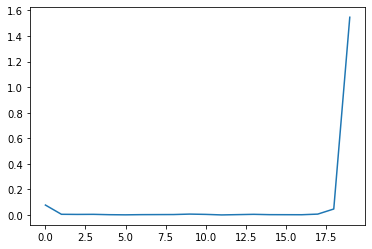

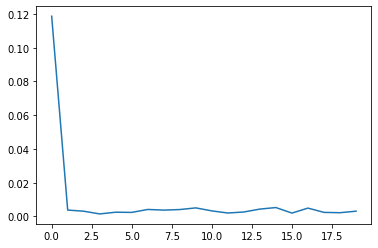

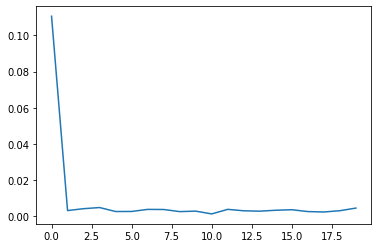

In [ ]:
for j in list_xx:
  list_y = []
  for i in range(0,20):
    coefs = np.polyfit(j, sigmoida_noize(j),deg = i)
    poly = np.poly1d(coefs)
    list_y.append(MSE(sigmoida_noize(x_test),poly(x_test)))
  plt.plot(list_y)
  plt.show()

Оптимальная степень обратно коррелирует с колличеством точек, так как при увеличении точек нам требуется меньше "изгибов" для полноуенного описания граффика

In [ ]:
# https://drive.google.com/file/d/13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb/view?usp=sharing
!gdown --id 13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb

Downloading...
From: https://drive.google.com/uc?id=13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb
To: /content/Advertising.csv
100% 5.17k/5.17k [00:00<00:00, 4.02MB/s]


In [ ]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
from sklearn.linear_model import LinearRegression

# Наша модель
reg = LinearRegression()

# Подготовим данные для неё
# На вход требуется 2D матрица, а у нас только один признак,
# и надо превратить его из 1D вектора (n,) в 2D матрицу (n, 1).
# Это можно сделать с помощью метода reshape
x = data["TV"].values.reshape(-1, 1) 
y = data["Sales"].values

# Обучаем нашу модель
reg.fit(x, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
print("Массив коэффициентов={}".format(reg.coef_))

Сдвиг=7.032593549127695
Массив коэффициентов=[0.04753664]


In [ ]:
X_new = pd.DataFrame({'TV': [1000]})
X_new.head()

,TV
0,1000


In [ ]:
reg.predict(X_new)

array([54.56923398])

In [ ]:
reg = LinearRegression()

X = data.drop("Sales", axis=1)
y = data["Sales"]

# Обучаем нашу модель
reg.fit(X, y)

# Коэффициенты
print("Сдвиг = {}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {} = {}".format(column, coef))

Сдвиг = 2.938889369459412
Коэффициент для TV = 0.0457646454553976
Коэффициент для Radio = 0.18853001691820448
Коэффициент для Newspaper = -0.0010374930424763285


In [ ]:
y_pred = reg.predict(X)

# Ошибка теперь равна:
print(mean_squared_error(y_pred, y))

2.784126314510936


In [ ]:
# Многие выбирают k=5 для начала
k = 5
errors = []

X = data.drop("Sales", axis=1)
y = data["Sales"]

# Размер одной части
fold_size = len(X) // k


for i in range(k):
    # Берём все значения, кроме выбранной части
    X_train = X[:i * fold_size].append(X[(i + 1) * fold_size:])
    y_train = y[:i * fold_size].append(y[(i + 1) * fold_size:])
    
    # Берём выбранную часть
    X_test = X[i * fold_size:(i + 1) * fold_size]
    y_test = y[i * fold_size:(i + 1) * fold_size]
    
    # На каждой итерации обучаемся отдельно и сохраняем ошибку
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    errors.append(mean_squared_error(y_pred, y_test))
    
# Выводим ошибку на кросс-валидации
print(np.mean(errors))

3.0729465971002106


In [ ]:
# А можно не париться и попросить sklearn всё сделать за нас
from sklearn.model_selection import cross_val_score

# Берём с отрицательным знаком, т.к. обычно туда передаётся не функция потерь, которую надо минимизировать
# А что-то вроде "функции успеха", которую надо максимизировать
errors = -cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print(np.mean(errors))

3.0729465971002106


In [ ]:
# L1
from sklearn.linear_model import Lasso

reg = Lasso( ).fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Lasso(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг=3.040215583480375
Коэффициент для TV=0.045661415380019485
Коэффициент для Radio=0.1834643975886825
Коэффициент для Newspaper=0.0

Результат=3.041405896751369


In [ ]:
# L2
from sklearn.linear_model import Ridge

reg = Ridge( ).fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг = {}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {} = {}".format(column, coef))
print()

errors = -cross_val_score(Ridge(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг = 2.9389674583301506
Коэффициент для TV = 0.045764643658018474
Коэффициент для Radio = 0.18852509681078544
Коэффициент для Newspaper = -0.0010362939589070004

Результат=3.072932673298496


In [ ]:
lambdas = np.arange(0.1, 3.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Lasso(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append((val, mean_squared_error(y_pred, y)))
    print(((val, mean_squared_error(y_pred, y))))
    

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Вычислим ошибку на кросс-валидации
# Лучшая модель
best_reg = Lasso(alpha=min_val)
cv_error = -np.mean(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]
(0.1, 2.7842286851696865)
(0.30000000000000004, 2.784985993046452)
(0.5000000000000001, 2.7857256993570276)
(0.7000000000000001, 2.7868352725638887)
(0.9000000000000001, 2.7883147049707757)
(1.1000000000000003, 2.7901639965776877)
(1.3000000000000003, 2.7923831473846246)
(1.5000000000000004, 2.7949721573915873)
(1.7000000000000004, 2.7979310265985737)
(1.9000000000000004, 2.801259755005587)
(2.1000000000000005, 2.804958342612624)
(2.3000000000000007, 2.8090267894196854)
(2.5000000000000004, 2.813465095426774)
(2.7000000000000006, 2.8182732606338856)
(2.900000000000001, 2.8234512850410236)

Оптимальная lambda:
Lambda=0.10, результат=3.07


In [ ]:
lambdas = np.arange(0.1, 5.0, 0.2)
erros = []
for val in lambdas:
    reg = Lasso(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    # Сохраняем ошибку на обучающей выборке
    erros.append(mean_squared_error(y_pred, y))
    lambda_errors.append((val, mean_squared_error(y_pred, y)))
    print(((val, mean_squared_error(y_pred, y))))

(0.1, 2.7842286851696865)
(0.30000000000000004, 2.784985993046452)
(0.5000000000000001, 2.7857256993570276)
(0.7000000000000001, 2.7868352725638887)
(0.9000000000000001, 2.7883147049707757)
(1.1000000000000003, 2.7901639965776877)
(1.3000000000000003, 2.7923831473846246)
(1.5000000000000004, 2.7949721573915873)
(1.7000000000000004, 2.7979310265985737)
(1.9000000000000004, 2.801259755005587)
(2.1000000000000005, 2.804958342612624)
(2.3000000000000007, 2.8090267894196854)
(2.5000000000000004, 2.813465095426774)
(2.7000000000000006, 2.8182732606338856)
(2.900000000000001, 2.8234512850410236)
(3.1000000000000005, 2.8289991686481857)
(3.3000000000000007, 2.8349169114553736)
(3.500000000000001, 2.841204513462586)
(3.7000000000000006, 2.8478619746698244)
(3.900000000000001, 2.8548892950770868)
(4.1000000000000005, 2.8622864746843755)
(4.300000000000001, 2.8700535134916887)
(4.500000000000001, 2.8781904114990278)
(4.7, 2.8866971687063905)
(4.9, 2.8955737851137786)


In [ ]:
### ваш код здесь
px.line(x=lambdas,y=erros,labels={'x':"Лямбды",'y':'MSE'})

In [ ]:
### ваш код здесь
lambdas = np.arange(0.1, 5.0, 0.2)
erros_rigde = []
for val in lambdas:
    reg = Ridge(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    erros_rigde.append(mean_squared_error(y_pred, y))
    lambda_errors.append((val, mean_squared_error(y_pred, y)))
    print(((val, mean_squared_error(y_pred, y))))

(0.1, 2.784126314557383)
(0.30000000000000004, 2.7841263149289524)
(0.5000000000000001, 2.784126315672079)
(0.7000000000000001, 2.784126316786751)
(0.9000000000000001, 2.7841263182729556)
(1.1000000000000003, 2.784126320130681)
(1.3000000000000003, 2.7841263223599153)
(1.5000000000000004, 2.7841263249606443)
(1.7000000000000004, 2.7841263279328574)
(1.9000000000000004, 2.784126331276542)
(2.1000000000000005, 2.7841263349916856)
(2.3000000000000007, 2.7841263390782762)
(2.5000000000000004, 2.784126343536301)
(2.7000000000000006, 2.7841263483657475)
(2.900000000000001, 2.784126353566604)
(3.1000000000000005, 2.784126359138858)
(3.3000000000000007, 2.7841263650824972)
(3.500000000000001, 2.784126371397509)
(3.7000000000000006, 2.7841263780838816)
(3.900000000000001, 2.784126385141603)
(4.1000000000000005, 2.78412639257066)
(4.300000000000001, 2.7841264003710404)
(4.500000000000001, 2.7841264085427326)
(4.7, 2.7841264170857234)
(4.9, 2.7841264260000016)


In [ ]:
px.line(x=lambdas,y=erros_rigde,labels={'x':"Лямбды",'y':'MSE'})

In [ ]:
# https://drive.google.com/file/d/1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu/view?usp=sharing
! gdown --id 1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu
data = pd.read_csv('diabetes.data.csv', sep='\t')
data = data.drop(columns=['S3'])
data.head()

Downloading...
From: https://drive.google.com/uc?id=1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu
To: /content/diabetes.data.csv
100% 18.5k/18.5k [00:00<00:00, 33.5MB/s]


,AGE,SEX,BMI,BP,S1,S2,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,4.0,4.2905,80,135


In [ ]:
target = 'Y'
X = data.drop([target], axis=1)
y = data[target]

X.shape, y.shape

((442, 9), (442,))

In [ ]:
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,9.090000,6.107000,124.000000,346.000000


In [ ]:
import seaborn as sns

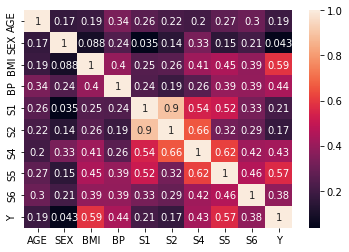

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Наша модель
liner = LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

errors = -cross_val_score(liner, X, y, cv=5, scoring='neg_mean_squared_error')
print(np.mean(errors))

2988.703991994889


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
lambdas = np.arange(0.1, 3.0, 0.2)
for value in lambdas:
    reg = Lasso(alpha=val)
    validation = -cross_val_score(reg, X, y, cv=4, scoring='neg_mean_squared_error')
    print(((value, np.mean(validation))))

(0.1, 3289.4855671364157)
(0.30000000000000004, 3289.4855671364157)
(0.5000000000000001, 3289.4855671364157)
(0.7000000000000001, 3289.4855671364157)
(0.9000000000000001, 3289.4855671364157)
(1.1000000000000003, 3289.4855671364157)
(1.3000000000000003, 3289.4855671364157)
(1.5000000000000004, 3289.4855671364157)
(1.7000000000000004, 3289.4855671364157)
(1.9000000000000004, 3289.4855671364157)
(2.1000000000000005, 3289.4855671364157)
(2.3000000000000007, 3289.4855671364157)
(2.5000000000000004, 3289.4855671364157)
(2.7000000000000006, 3289.4855671364157)
(2.900000000000001, 3289.4855671364157)


In [ ]:
for value in lambdas:
    reg = Ridge(alpha=val)
    validation = -cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')
    print(((value, np.mean(validation))))

(0.1, 2998.2593994811346)
(0.30000000000000004, 2998.2593994811346)
(0.5000000000000001, 2998.2593994811346)
(0.7000000000000001, 2998.2593994811346)
(0.9000000000000001, 2998.2593994811346)
(1.1000000000000003, 2998.2593994811346)
(1.3000000000000003, 2998.2593994811346)
(1.5000000000000004, 2998.2593994811346)
(1.7000000000000004, 2998.2593994811346)
(1.9000000000000004, 2998.2593994811346)
(2.1000000000000005, 2998.2593994811346)
(2.3000000000000007, 2998.2593994811346)
(2.5000000000000004, 2998.2593994811346)
(2.7000000000000006, 2998.2593994811346)
(2.900000000000001, 2998.2593994811346)


In [ ]:
reg = Ridge(alpha=0.1)
validation = -cross_val_score(reg, X, y, cv=4, scoring='neg_mean_squared_error')
print(((value, np.mean(validation))))

(2.900000000000001, 2944.5179792996696)


2944 - минимальное, можно меньше но это несет за собой издежки создания "новых features", делал модель похожую на модель в дл (я там тоже прохожу) довел до 2600, но ее стыдно показывать не уверен в ее правильности, она работает за счет увеличения столбцов и их перемножении, однако есть "костыли" поэтому только 2944(

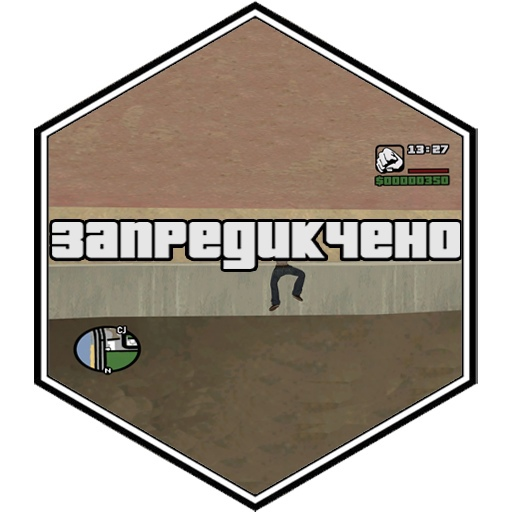